<a href="https://colab.research.google.com/github/nathannguyen0127/MANE4962-Machine-Learning-for-Engineering/blob/main/Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MANE 4962: Machine Learning for Engineering***

**Homework 2**

Nathan Nguyen : RIN 662029534

# **Problem 1.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

petal_area = iris.data[:,2:3] * iris.data[:,3:]
sepal_area = iris.data[:,0:1] * iris.data[:,1:2]

X = np.array([[a[0], b[0]] for a, b in zip(petal_area, sepal_area)])
y = iris.target


X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.80,
    train_size=0.20,
    random_state=123,
    shuffle=True,
    stratify=y)


clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 0 1 1 0 1 0 1 2 2 0 0 2 2 1 1 0 2 0 0 2 2 1 2 0 2 1 1 1 0 2 0 0 0 2 1 0
 0 1 0 0 0 1 2 1 0 2 1 1 1 0 0 1 1 0 1 1 0 1 2 1 2 1 1 1 0 0 0 0 1 1 2 0 2
 1 1 2 0 2 1 0 0 1 2 2 2 2 1 2 0 1 2 1 0 1 0 1 2 1 0 2 1 1 1 1 2 2 1 2 2 1
 0 0 0 1 1 1 0 0 1]
actual iris species
[2 0 1 1 0 1 0 1 2 2 0 0 2 2 1 2 0 2 0 0 2 2 1 2 0 2 1 1 1 0 1 0 0 0 2 1 0
 0 1 0 0 0 1 2 1 0 2 1 1 1 0 0 2 1 0 1 1 0 1 2 1 2 1 1 2 0 0 0 0 1 1 2 0 2
 2 2 2 0 2 1 0 0 1 2 2 2 2 2 2 0 1 2 2 0 1 0 1 2 1 0 2 2 2 1 1 2 2 1 2 2 1
 0 0 0 1 1 1 0 0 1]
accuracy score : 0.9083333333333333


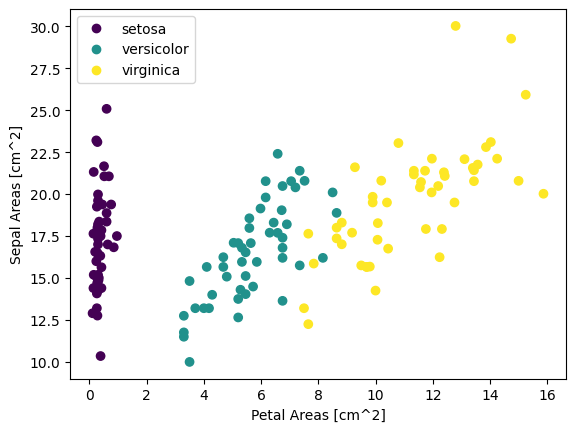

In [ ]:
%notebook inline

plot = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Petal Areas [cm^2]")
plt.ylabel("Sepal Areas [cm^2]")
plt.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())

# **Problem 2.**

A pairplot would not be reasonable to use. A pairplot is primarily used to show relationships and correlationships between features/variables. Within the context of the MNIST dataset, the rows and columns of the image would correlate to the features of the plot. This would make it an 8x8 pairplot which could work but would be hard to interpret. There are also better methods of displaying the method such as a heatmap as displayed below.


## Version A. sklearn MNIST

It correctly classified 36 6's.

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


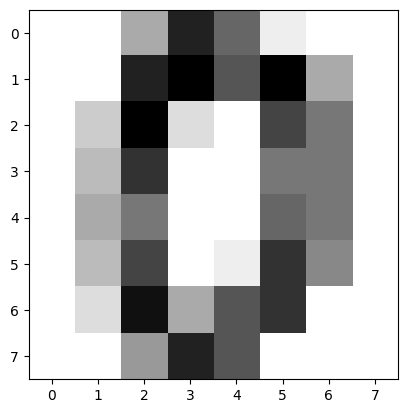

In [ ]:
from sklearn import datasets
import numpy as np

# load the data
digits = datasets.load_digits()

images = digits.images

print(images[1])
targets = digits.target

# Filter out odd numbers (1, 3, 5, 7, 9) from datasets
odd_numbers = {0, 2, 4, 6, 8}

# Filter training data
X = images[np.isin(targets, list(odd_numbers))]
y = targets[np.isin(targets, list(odd_numbers))]

import matplotlib.pyplot as plt
plt.imshow(X[0], cmap=plt.cm.gray_r)

In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)

class My_KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for i in range(X_test.shape[0]):
            predictions.append(self._knn_classifier(X_test[i]))
        return predictions
    def _knn_classifier(self, X_test):
        distances, targets = [], []
        for i in range(self.X_train.shape[0]):
            distance = np.linalg.norm(self.X_train[i]-X_test)
            distances.append([distance, i])
        distances = sorted(distances)
        for i in range(self.k):
            index = distances[i][1]
            targets.append(self.y_train[index])
        return max(targets, key=targets.count)

model = My_KNNClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))

0.996268656716418


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           4       0.97      1.00      0.99        36
           6       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



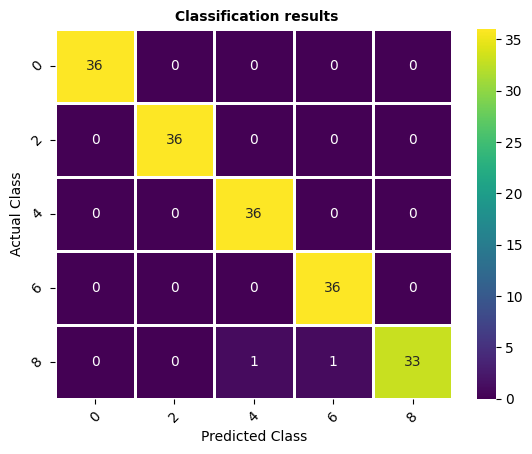

In [ ]:
cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);

evens = ['0','2','4','6','8']
ax.set_xticklabels(evens);
ax.set_yticklabels(evens);
plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(y_test, model.predict(X_test)))

## Version B. keras MNIST

It correctly classified 958 6's.

training images shapes:  (60000, 28, 28)
testing images shapes:  (10000, 28, 28)
training targets shapes:  (60000,)
testing targers shapes:  (10000,)


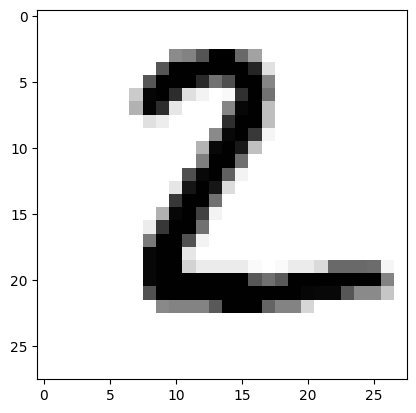

In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter out odd numbers (1, 3, 5, 7, 9) from datasets
even_numbers = {0, 2, 4, 6, 8}

# Filter training data
X_train = x_train[np.isin(y_train, list(even_numbers))]
Y_train = y_train[np.isin(y_train, list(even_numbers))]

X_test = x_test[np.isin(y_test, list(even_numbers))]
Y_test = y_test[np.isin(y_test, list(even_numbers))]

import matplotlib.pyplot as plt
plt.imshow(X_test[0], cmap=plt.cm.gray_r)

In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print(accuracy_score(Y_test, preds))

0.9868047097036134


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926



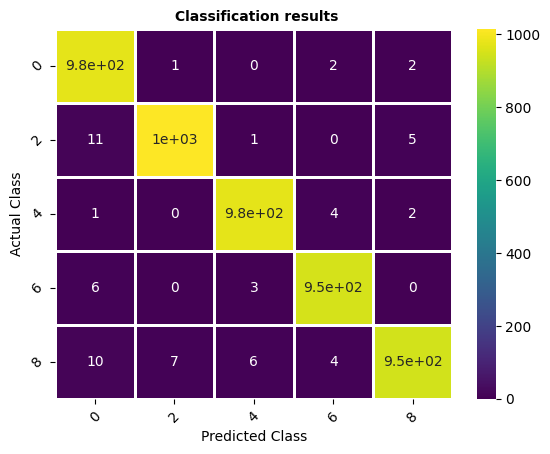

In [ ]:
cm = confusion_matrix(Y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);

evens = ['0','2','4','6','8']
ax.set_xticklabels(evens);
ax.set_yticklabels(evens);
plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(Y_test, model.predict(X_test)))

# **Problem 3.**

In [58]:
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['petal length'] = data['data'][:,1]
df['petal width'] = data['data'][:,2]

X = df.to_numpy() # These are our features
df['target'] = data['target']
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])

df['species_name'] = named_targets
y = df['target'].to_numpy()

display(df)

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

,sepal length,petal length,petal width,target,species_name
0,5.1,3.5,1.4,0,setosa
1,4.9,3.0,1.4,0,setosa
2,4.7,3.2,1.3,0,setosa
3,4.6,3.1,1.5,0,setosa
4,5.0,3.6,1.4,0,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2,virginica
146,6.3,2.5,5.0,2,virginica
147,6.5,3.0,5.2,2,virginica
148,6.2,3.4,5.4,2,virginica


In [66]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

model = KMeans(k=3)
model.fit(X_train)

kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids

print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [1 1 1 1 1 2 2 1 0 2 1 2 1 0 1 0 1 1 0 2 2 0 0 1 2 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 1]
cluster centroids: [[4.77777778 3.11666667 1.55555556]
 [6.22318841 2.84927536 4.88695652]
 [5.31111111 3.7        1.50555556]]


In [63]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)
skmodel_labels = skmodel.predict(X_test) # predict labels, remember the integers do not make same sense in training and testing for clustering

print('predicted_labels:', skmodel_labels)
print('actual_labels:', y_test)

predicted_labels: [2 0 3 2 0 1 1 2 1 1 0 1 0 1 2 1 2 2 1 1 1 1 1 2 1 2 0 1 2 0 0 0 2 3 3 3 2
 2 2 1 0 3 3 0 2]
actual_labels: [1 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 1 2 0 2 1 1 2 1]


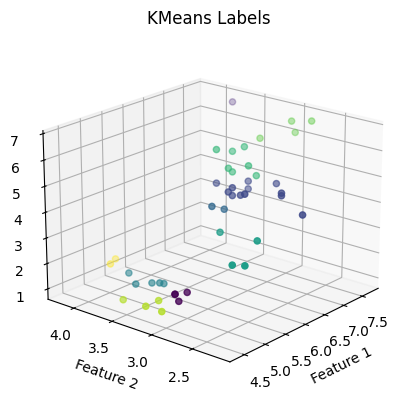

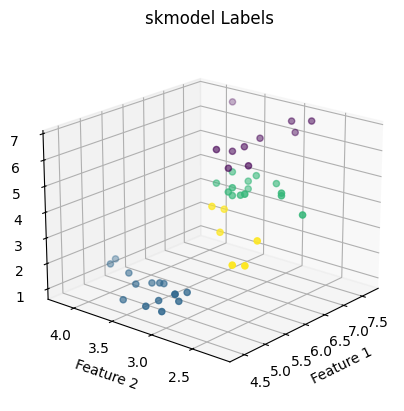

In [65]:
import matplotlib.pyplot as plt

# Figure 1: KMeans labels
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=kmeans_labels)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('KMeans Labels')

# Figure 2: skmodel labels
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=skmodel_labels)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.set_title('skmodel Labels')

# Set orientation for Figure 1
ax1.view_init(elev=20, azim=-140) # Adjust elev and azim as needed

# Set orientation for Figure 2
ax2.view_init(elev=20, azim=-140) # Adjust elev and azim as needed

plt.show()

When varying thte cluster number, the higher cluster count tend towards a lower silhouette score which indicates samples are near the cluster boundary where k=2 and k=3 are the only greater than the recommended 0.5

Text(0, 0.5, 'silhouette scores')

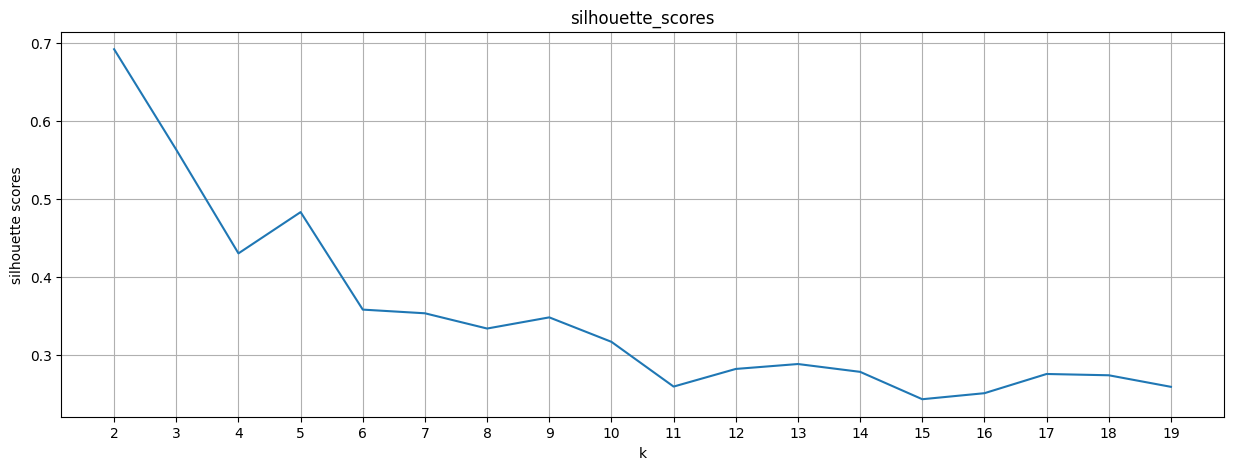

In [62]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++',
    n_init='auto',)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), silhouette_scores)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('silhouette_scores')
plt.xlabel('k')
plt.ylabel('silhouette scores')